<script type="module">
      import mermaid from 'https://cdn.jsdelivr.net/npm/mermaid@10/dist/mermaid.esm.min.mjs';
</script>
<style>

    table {
        font-size: 2rem !important;
    }
</style>



# Les testes

<img style="height: 300px" src="images/007_broken/001.jpg">


## C'est quoi un tests?

<img style="height: 300px" src="images/007_broken/002.jpg">


### C'est quoi un test?

> C'est du code qui vérifie du code.

-- didier 


### C'est quoi un test?

> En informatique, un test désigne une procédure de vérification partielle d'un système. Son objectif principal est d'identifier un nombre maximal de comportements problématiques du logiciel. Il permet ainsi, dès lors que les problèmes identifiés seront corrigés, d'en augmenter la qualité.

-- wikipedia

### Pyramide de tests

<img style="height: 300px" src="images/007_broken/003.png">

### Tous les tests ne sont pas égaux

* Le plus de choses un test vérifie, le moins le test veut dire quelque chose

* Le plus de choses un test vérifie, le plus façile il est à écrire

> Monsieur le garagiste, je n'ai pas réussit à aller à l'épicerie avec ma voiture aujourd'hui.  Je pense qu'elle est brisé.  Pouvez-vous la réparer, si oui, quand sera-t-elle réparée ?

-- didier, la première fois qu'il ira au garagiste

### Les différents niveaux de tests

<img style="height: 300px" src="images/007_broken/test_pyramide.png">


### Test d'acceptation (Acceptance testing)

> En informatique, le test d'acceptation (ou recette) est une phase de développement des projets, visant à assurer formellement que le produit est conforme aux spécifications (réponse donnée à un instant « t » aux attentes formulées). Elle s'inscrit dans les activités plus générales de qualification.


* Executé juste avant de déployer en production

* Test plusieurs systèmes

* Test très vaste

* D'habitude fait par les QAs

### Tests système (System testing)

> Les tests système de logiciel ou de matériel réfèrent à un processus de test d'un système intégré afin d'évaluer sa conformité aux exigences spécifiées. 


* Test 1 système de bout-en-bout

* Même chose qu'un système d'acceptation mais sur 1 système

* D'habitude fait par les QAs

### Test d'intégration (Integration testing)

> Vérifie le bon fonctionnement d'une partie précise d'un logiciel ou d'une portion d'un programme (appelée « unité » ou « module ») ; dans le test d’intégration, chacun des modules indépendants du logiciel est assemblé et testé dans l’ensemble.

* Test une partie d'un système
* Test avec des "gros" mocks, (aka une base de donnée faite que pour cela)
* Fait par les développeurs

### Test de composants (unit testing)

> En programmation informatique, le test unitaire est une procédure permettant de vérifier le bon fonctionnement d'une partie précise d'un logiciel ou d'une portion d'un programme (appelée « unité » ou « module »).

* Test une seule fonction sans dépendences sur autre services
* Fait par les développeurs
* Les dieux du test


### Comment écire des tests?

<img style="height: 300px" src="images/007_broken/004.jpg">

### Exercice

Écrire un test de la fonction suivante

```python
def is_balanced(text: str) -> bool:
    counter = 0
    for letter in text:
        if letter == "(":
            counter += 1
        if letter == ")":
            counter -= 1
        if counter < 0:
            return False
    return counter == 0
```

### Réponse

```python
def test_is_balances():
    assert is_balanced("")
    assert is_balanced("()")
    assert is_balanced("(()())")
    assert not is_balanced("((())")
    assert not is_balanced("(()))")
    assert not is_balanced(")")
```

### Exercice

Écrire un test de la fonction suivante

```python
def is_balanced_file(file_path: Path) -> bool:
    with open(file_path, "r") as file_:
        text = file_.read()
        counter = 0
        for letter in text:
            if letter == "(":
                counter += 1
            if letter == ")":
                counter -= 1
            if counter < 0:
                return False
        return counter == 0
```

### Note sur la réponse

* La méthode est façile à tester car elle  fait une seule chose! Il s'agit du **S** dans **S**olid

### Réponse, option 1

```python
def write_to_tmp_file(tmp_dir: Path, content: str) -> Path:
    tmp_file = tmp_dir / "foo.txt"
    tmp_file.write_text(content)
    return tmp_dir


def test_is_balanced_file(tmp_path):
    tmp_path = Path(tmp_path)
    assert is_balanced_file(write_to_tmp_file(tmp_path, ""))
    assert is_balanced_file(write_to_tmp_file(tmp_path, "()"))
    assert is_balanced_file(write_to_tmp_file(tmp_path, "(()())"))
    assert not is_balanced_file(write_to_tmp_file(tmp_path, "((())"))
    assert not is_balanced_file(write_to_tmp_file(tmp_path, "(()))"))
    assert not is_balanced_file(write_to_tmp_file(tmp_path, ")"))
```

### Note sur la réponse 1

* Ceci est un test d'intégration

* Le test dépend de fichiers
   * Ça semble peu, mais ça peut être problématique

### Réponse, option 2, partie 1

> premièrement, on change la fonction

```python
def is_balanced_file_object(file_path: typing.IO[str]) -> bool:
    text = file_path.read()
    counter = 0
    for letter in text:
        if letter == "(":
            counter += 1
        if letter == ")":
            counter -= 1
        if counter < 0:
            return False
    return counter == 0
```


### Réponse, option 2, partie 2

> On test avec une version inmemory

```python
def test_is_balanced_file_object() -> None:
    assert is_balanced_file_object(io.StringIO(""))
    assert is_balanced_file_object(io.StringIO("()"))
    assert is_balanced_file_object(io.StringIO("(()())"))
    assert not is_balanced_file_object(io.StringIO("((())"))
    assert not is_balanced_file_object(io.StringIO("(()))"))
    assert not is_balanced_file_object(io.StringIO(")"))

```

### Note sur la réponse 2

* Pour rendre la méthode façile à tester, il faut utiliser la notion d'*Inversion des dépendances* de SOLI**D**

### Réponse, option 3

> On change la fonction `is_balanced_file` pour utiliser la fonction `is_balanced`
> On ne test pas la méthode `is_balanced_file`

```python
def is_balanced_file(file_path: Path) -> bool:
    with open(file_path, "r") as file_:
        return is_balanced(file_.read())
```

### Note sur la réponse option 3

* Le code coverage du résultat sera plus bas

* Est-ce vraiment grave?  didier pense que non

### Exercice

* Écrire une fonction qui prend en argument une liste d'entiers `lst` et un entier `target`.  La fonction doit retourner 2 nombres de la `lst` (possiblement deux fois le même nombre) `a` et `b` tel que `a + b = target`.  

* Tester la fonction 

https://leetcode.com/problems/two-sum/

#### Exemple

```python
lst = [55, 20, 76, 34, 80, 26]
target = 100
result = (20, 80)
```

### Exercice

* Écrire une fonction qui prend un string en paramêtre et qui retourne le plus long "sous-string" qui est un palindrome

* Tester la fonction 

https://leetcode.com/problems/longest-palindromic-substring/
    
#### Exemple

```python
input_ = "la plus belle ville au monde est laval."
result = "laval"
```

### Petit (moyer, ok gros.. ) exercice

En utilisant le module `random` de python, écrire une fonction qui retoure un mouvement brownien de longeur $n$ et tester le.


Un mouvement brownien est une liste de nombre où le premier item est $0$ et l'item $n+1$ est définit comme la valeur de l'item $n$ plus une valeur aléatoire provenant d'une normale de moyenne 0 et d'écart-type 1. 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


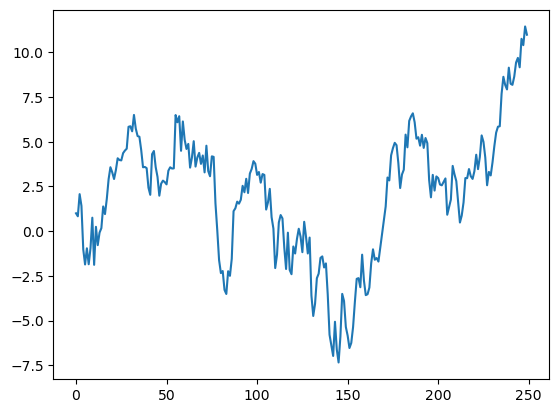

In [17]:
%pylab inline
from random import Random

def brownian_movement(n, random):
    ret = [1]
    for i in range(n - 1):
        ret.append(ret[-1] + random.gauss(0, 1))
    return ret

plot(list(range(250)), brownian_movement(250, Random(80)))
None

### Pytest: fixtures

<img style="height: 300px" src="images/007_broken/008.jpg">

### Problème explicatif

* Écrire une fonction qui prend le nom d'un fichier et qui compte le nombre de ligne dans le fichier

* Écrire un teste

In [27]:
# Solution

def count_number_of_line(filename: str) -> int:
    with open(filename, "rt") as file_:
        return file_.read().count("\n")
    

### Pour tester cela

1. On va créer un fichier temporaire
1. On va écrire un tests
1. On va effacer le fichier temporaire

### Ce qui se passe avant le test

* Ce qui se passe avant un test se nomme souvant "setup", "beforeEach"

* Si nous ne sommes pas capable de rouler le "setup", le test doit échouer

### Ce qui se passe après le test

* Ce qui se passe après le teste se nomme souvant "tearDown", "afterEach"

* Il est important que ce qui se passe après le test soit toujours executé!

### Pytest - fixtures

* Pytest utilise un manière un peu particulière pour gérer les setup & teardown

* Chaque setup et teardown est associé à une "chose": la fixture
    
* Le code qui génère une fixture est un "setup"

* Le code qui est roulé après une fixture est un "teardown" (avancé)

### Utiliser des fixtures

* Les arguments des fonctions tests sont des fixtures

* Pytest inclue des fixtures https://docs.pytest.org/en/6.2.x/fixture.html

* La fixture la plus utile est https://docs.pytest.org/en/6.2.x/reference.html#std-fixture-tmp_path

```python
from pathlib import Path

def test_copy_file(tmp_path: Path) -> None:
    ...

```

### Créer nos fixtures

```python
import pytest

@pytest.fixture
def odd_number() ->:
    return 2 * 25231

def test_is_odd(odd_number) -> None:
    assert is_odd(odd_number)
    assert not is_odd(odd_number + 1)
```

### Créer nos fixtures... suite

* Les fixtures peuvent utiliser d'autres fixtures


```python
import pytest

@pytest.fixture
def odd_number() -> number:
    return 2 * 25231

@pytest.fixture
def even_number(odd_number) -> number:
    return odd_number + 1

def test_is_odd(even_number) -> None:
    assert not is_odd(even_number)
    assert is_odd(even_number - 1)
```

### Exercices - 1

* Écrire un programme qui prend le nom d'un fichier JSON personnes et qui retourne le nombre d'homme dans le fichier.

* Tester la fonction en utilisant des fixtures

**exemple d'input**

```json
[
    {"name": "paulette", "sexe": "femme"},
    {"name": "claudette", "sexe": "homme"},
    {"name": "paul", "sexe": "homme"},
    {"name": "herménégilde", "sexe": "homme"},
]

```

### Exercices - 2

* Écrire un programme qui prend deux nom de fichiers et qui vérifie si les deux fichiers ont le même contenue

* Tester la fonction en utilisant des fixtures

### Exercices - 3

* Écrire une fonction qui prend un Player et qui **ajoute** à un fichier une ligne avec la personne sérialisé en format `{prenom} {nom de famille} - {équipe}`

* Tester la fonction en utilisant des fixtures 


```python
class Player:
    def __init__(self, first_name, last_name, team):
        self.first_name = fist_name
        self.last_name = last_name
        self.team = team

        
def serialize_player_to_file(player: Player, filename: Path) -> None:
    pass
```


# Mocks

<img style="height: 300px" src="images/007_broken/007.jpeg">

### Des fois, nous ne sommes pas capable d'isoler nos functions

1. La fonction ne fait que du input/output

1. La fonction dépend de libraries merdiques

1. Il serait compliquer de tout découpler

### Exercices

* Écrire une fonction qui prend en argument un url ainsi qu'un nom de fichier et qui télécharge l'url dans le fichier.

* Tester la fonction

**truc**

* utiliser l'url https://httpbin.org/get
* utiliser la librarie requests

* il n'y a pas de *trucs* ici, il faut faire du IO :(

### Que pouvons nous faire dans cette situation là?

1. Utilisé du IO mais très restraint (pas toujours possible)

2. Mocker

### Python mock

* Python possède une des meilleur libraries pour faire des mocks

* https://docs.python.org/3/library/unittest.mock.html

## TDD

<img style="height: 300px" src="images/007_broken/005.jpg">

### Écrire des tests est difficile

* On a vue qu'écrire des tests est difficile.

* Les fonctions doivent faire une et une unique chose

* Les fonctions doivent utiliser la notion la notion d'*Inversion des dépendances*

### Est-ce que nous pouvons nous faciliter la vie?

Oui!  En écrivant les tests avant d'écrire le code.

### **T**est **D**riven **D**evelopment


* Développé par Kent Beck

* Provien du début des années 2000

* Est un accronyme vraiment important à ajouter à votre CV

### Les 3 phases du TDD

<img style="height: 300px" src="images/007_broken/tdd.png">

### Les 3 phases du TDD

#### État initial
1. Tous les tests passent

#### Développement
1. Nous allons écrire un test unitaire qui ne passe pas
1. Nous allons écrire le code **minimal** pour le faire passer
1. Nous allons bouger des choses dans le code (refactoring)
1. On recommence


#### État final
1. Tous les tests passent

### Pourquoi TDD

1. Nous allons avoir un ensemble de test qui vérifie parfaitement le logiciel

1. Le code sera testable dès le jour 1

1. Le project sera toujour à 15 minutes d'être près pour la production

1. Nous allons avoir des exemples de chanques fonction dans le code

1. Nous allons utiliser très peu de mocks

1. Les tests seront aussi beau que le code de base

## Références

<img style="height: 300px" src="images/007_broken/006.jpg">

### Bibliographie

* https://youtu.be/k7_WBqd6C0Y
    
* https://youtu.be/wMY5FE59rkI

* https://tddmanifesto.com
